# transversity

In [1]:
import sys,os
os.chdir('../../')
import itertools as it
import numpy as np
import pandas as pd
from scipy.special import beta
from scipy.integrate import quad
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from resman import RESMAN
import nest

## setup

In [2]:
conf=load_config('inputs/transversity/transversity-0.py')
resman=RESMAN(conf);
parman=resman.conf['parman']

loading sidis data sets 3013

## data vs theory

In [3]:
resman.get_residuals(parman.par);

In [4]:
D={}
for k in ['had','tar','dep','col','chi2','npts']: D[k]=[]
for k in conf['datasets']['sidis']['xlsx']:
    D['tar'].append(resman.sidisres.tabs[k]['target'][0])
    D['dep'].append(resman.sidisres.tabs[k]['dependence'][0])
    D['col'].append(resman.sidisres.tabs[k]['col'][0].upper().strip())
    D['had'].append(resman.sidisres.tabs[k]['hadron'][0])
    D['npts'].append(resman.sidisres.tabs[k]['residuals'].size)
    D['chi2'].append(np.sum(resman.sidisres.tabs[k]['residuals']**2))
D=pd.DataFrame(D)
D.sort_values(by=['chi2'])

,chi2,col,dep,had,npts,tar
13,0.978160,COMPASS,pt,pi-,6,proton
7,1.081803,HERMES,z,pi-,6,proton
6,1.508767,HERMES,pt,pi-,5,proton
2,1.961596,COMPASS,z,pi+,6,deuteron
0,2.422923,COMPASS,x,pi+,6,deuteron
10,2.598195,HERMES,pt,pi+,5,proton
11,2.647528,COMPASS,pt,pi+,6,proton
8,2.813636,COMPASS,z,pi+,6,proton
3,3.206348,COMPASS,x,pi-,6,deuteron
16,3.231723,COMPASS,x,pi-,7,proton


In [5]:
print 'N=',np.sum(D.npts)
print 'chi2=',np.sum(D.chi2)

N= 106
chi2= 69.3019109463


## AUT plot

In [6]:
def get_key(K,tar,had,col,tabs,dep):
    kk=None
    for k in K:
        d=tabs[k]
        #print '-->',d['target'].values[0],d['hadron'].values[0],d['col'].values[0].upper()
        if tar==d['target'][0] \
            and had==d['hadron'][0] \
            and dep==d['dependence'][0] \
            and col==d['col'][0].upper().strip(): kk=k
    return kk

tabs=resman.sidisres.tabs
def plot(idx,dep,tar,had,col,legend=False):
    #print tar,had,col
    k=get_key(tabs.keys(),tar,had,col,tabs,dep)
    d1=resman.sidisres.tabs[k]
    ax=py.subplot(nrows,ncols,idx)
    dep=d1['dependence'][0]
    #obs=d['obs'].values[0]
    tar=d1['target'][0]
    had=d1['hadron'][0]
    if dep=='pt': dep='pT'
    sign=1
    if col=='COMPASS': sign=-1
    shift=0
    if '-' in had:shift=0.005
    if '-' in had: e=ax.errorbar(d1[dep]+shift,sign*d1['value'],d1['alpha'],fmt='kv')
    if '+' in had: e=ax.errorbar(d1[dep]+shift,sign*d1['value'],d1['alpha'],fmt='k^')
    #b1=ax.fill_between(d1[dep],sign*(d1['thy']-d1['dthy']),sign*(d1['thy']+d1['dthy']),color='Yellow',alpha=0.5)
    l1,=ax.plot(d1[dep],sign*d1['thy'],'k--')
    if dep=='x': ax.set_xlabel(r'$\boldsymbol{x}$',size=20)
    if dep=='z': ax.set_xlabel(r'$\boldsymbol{z}$',size=20)
    if dep=='pT': ax.set_xlabel(r'$\boldsymbol{p_T}$',size=20)
    ax.xaxis.set_label_coords(0.95, -0.02)
    if dep=='x':
        ax.set_xlim(0,0.3)
        ax.set_xticks([0.1,0.2])
    if dep=='z':
        ax.set_xlim(0.2,0.65)
        ax.set_xticks([0.3,0.4,0.5])
    if dep=='pT':
        ax.set_xlim(0.1,0.9)
        ax.set_xticks([0.2,0.4,0.6])

    #if dep=='pT':ax.set_xlim(0.2,0.65)
    #ax.tick_params(axis='both', which='major', labelsize=16)
    #ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.set_ylabel(obs)
    #ax.set_title('%s %s %s'%(tar,had.replace('+','').replace('-',''),col))
    #ax.set_xlim(0,0.3)
    #ax.set_ylim(-.1,.1)
    #ax.set_xticklabels([])
    ax.text(0.1,0.1,col,transform=ax.transAxes,size=10)
    if legend: return ax,l1,e
    else: return ax


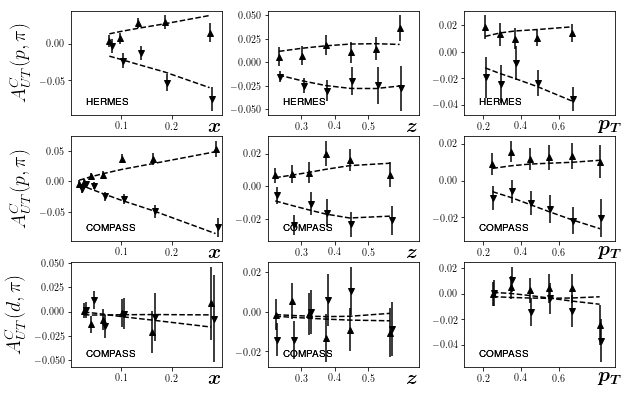

In [8]:
nrows,ncols=6,3
py.figure(figsize=(ncols*3,nrows*2))

ax=plot(1,'x','proton','pi+','HERMES')
ax=plot(1,'x','proton','pi-','HERMES')
ax.set_ylabel(r'$A_{UT}^{C}(p,\pi)$',size=20)
ax=plot(2,'z','proton','pi+','HERMES')
ax=plot(2,'z','proton','pi-','HERMES')
ax=plot(3,'pt','proton','pi+','HERMES')
ax=plot(3,'pt','proton','pi-','HERMES')

ax=plot(4,'x','proton','pi+','COMPASS')
ax=plot(4,'x','proton','pi-','COMPASS')
ax.set_ylabel(r'$A_{UT}^{C}(p,\pi)$',size=20)
ax=plot(5,'z','proton','pi+','COMPASS')
ax=plot(5,'z','proton','pi-','COMPASS')
ax=plot(6,'pt','proton','pi+','COMPASS')
ax=plot(6,'pt','proton','pi-','COMPASS')

ax=plot(7,'x','deuteron','pi+','COMPASS')
ax=plot(7,'x','deuteron','pi-','COMPASS')
ax.set_ylabel(r'$A_{UT}^{C}(d,\pi)$',size=20)
ax=plot(8,'z','deuteron','pi+','COMPASS')
ax=plot(8,'z','deuteron','pi-','COMPASS')
ax=plot(9,'pT','deuteron','pi+','COMPASS')
ax=plot(9,'pT','deuteron','pi-','COMPASS')

# ax=plot(10,'x','proton','k+','HERMES')
# ax=plot(10,'x','proton','k-','HERMES')
# ax.set_ylabel(r'$A_{UT}^{C}(p,K)$',size=20)
# ax=plot(11,'z','proton','k+','HERMES')
# ax=plot(11,'z','proton','k-','HERMES')
# ax=plot(12,'pt','proton','k+','HERMES')
# ax=plot(12,'pt','proton','k-','HERMES')

# ax=plot(13,'x','proton','k+','COMPASS')
# ax=plot(13,'x','proton','k-','COMPASS')
# ax.set_ylabel(r'$A_{UT}^{C}(p,K)$',size=20)
# ax=plot(14,'z','proton','k+','COMPASS')
# ax=plot(14,'z','proton','k-','COMPASS')
# ax=plot(15,'pt','proton','k+','COMPASS')
# ax=plot(15,'pt','proton','k-','COMPASS')


# ax=plot(16,'x','deuteron','k+','COMPASS')
# ax=plot(16,'x','deuteron','k-','COMPASS')
# ax.set_ylabel(r'$A_{UT}^{C}(d,K)$',size=20)
# ax,b1,ep=plot(17,'z','deuteron','k+','COMPASS',legend=True)
# ax,b1,em=plot(17,'z','deuteron','k-','COMPASS',legend=True)
# ax=plot(18,'pT','deuteron','k+','COMPASS')
# ax=plot(18,'pT','deuteron','k-','COMPASS')
# ax.legend([b1,ep,em],[r'$\rm SIDIS$',r'$(\pi^+,K^+)$',r'$(\pi^-,K^-)$']\
#           ,loc='upper center', bbox_to_anchor=(0.5, -0.3)\
#           ,fancybox=True, shadow=False, ncol=4,fontsize=17)

py.subplots_adjust(wspace=0.3, hspace=0.2,left=0.11, bottom=0.1, right=0.95, top=0.95)
#py.savefig('gallery/dvt.pdf')

## PDFs and FFs

In [9]:
def calc(func,msg):
    f =func()
    f=np.einsum('if->fi',f)
    return {'f':f}

## Transversity

In [10]:
X1=10**np.linspace(-3,-1)
X2=np.linspace(0.101,0.999)
X=np.append(X1,X2)
h1=calc(lambda : [resman.conf['transversity'].get_C(x,1) for x in X],'calc h')

In [11]:
Z1=10**np.linspace(-3,-1)
Z2=np.linspace(0.101,0.999)
Z=np.append(Z1,Z2)
Hpi1=calc(lambda : [resman.conf['collins'].get_C(z,1,'pi+') for z in Z],'calc H(pi+)')

In [12]:
Z1=10**np.linspace(-3,-1)
Z2=np.linspace(0.101,0.999)
Z=np.append(Z1,Z2)
Hk1=calc(lambda : [resman.conf['collins'].get_C(z,1,'k+') for z in Z],'calc H(k+)')

In [13]:
def get_kinematics():
    tabs=resman.sidisres.tabs
    X,Z,Q2,pT=[],[],[],[]
    for k in tabs:X=np.append(tabs[k]['x'],X)
    for k in tabs:Z=np.append(tabs[k]['z'],Z)
    for k in tabs:Q2=np.append(tabs[k]['Q2'],Q2)
    for k in tabs:pT=np.append(tabs[k]['pT'],pT)
    return {'X':X,'Z':Z,'Q2':Q2,'pT':pT}
kin=get_kinematics()

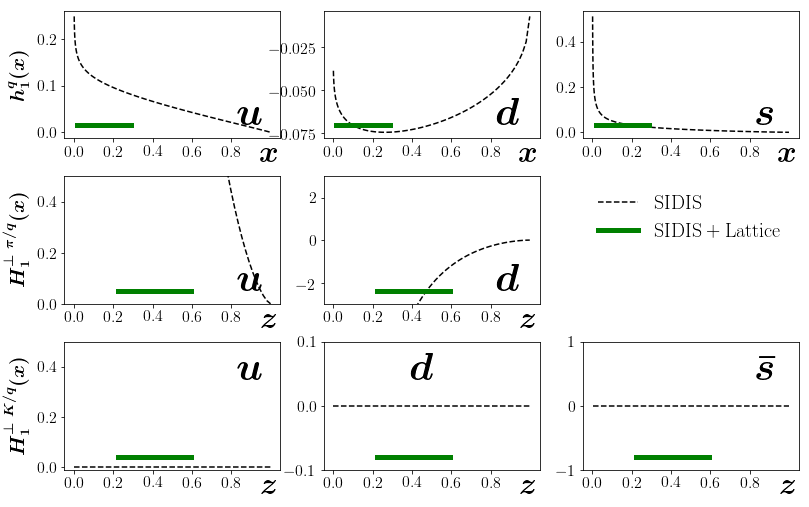

In [14]:
nrows,ncols=3,3
py.figure(figsize=(ncols*4,nrows*2.5))

def plot(idx,flav,legend=False,ylims=None):
    ax=py.subplot(nrows,ncols,idx)
    #band1=ax.fill_between(X,(h1['f'][flav]-h1['df'][flav]),(h1['f'][flav]+h1['df'][flav]),color='Yellow',alpha=0.5)
    line1,=ax.plot(X,h1['f'][flav],'k--')
    #band2=ax.fill_between(X,(h2['f'][flav]-h2['df'][flav]),(h2['f'][flav]+h2['df'][flav]),color='r',alpha=0.5)
    #line2,=ax.plot(X,h2['f'][flav],'r-')
    if ylims!=None: ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(r'$\boldsymbol{x}$',size=30)
    ax.xaxis.set_label_coords(0.95, -0.02)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([0,.2,.4,.6,.8])
    xmin=np.amin(kin['X'])
    xmax=np.amax(kin['X'])
    ymin, ymax = ax.get_ylim()
    dy=0.1*(ymax-ymin)
    ax.plot([xmin,xmax],[ymin+dy,ymin+dy],'g-',lw=5)
    return ax
 
def plotpi(idx,flav,ylims=None):
    ax=py.subplot(nrows,ncols,idx)
    #band1=ax.fill_between(Z,(Hpi1['f'][flav]-Hpi1['df'][flav]),(Hpi1['f'][flav]+Hpi1['df'][flav]),color='Yellow',alpha=0.5)
    line1,=ax.plot(Z,Hpi1['f'][flav],'k--')
    #band2=ax.fill_between(Z,(Hpi2['f'][flav]-Hpi2['df'][flav]),(Hpi2['f'][flav]+Hpi2['df'][flav]),color='r',alpha=0.5)
    #line2,=ax.plot(Z,Hpi2['f'][flav],'r-')
    if ylims!=None: ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(r'$\boldsymbol{z}$',size=30)
    ax.xaxis.set_label_coords(0.95, -0.02)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([0,.2,.4,.6,.8])
    zmin=np.amin(kin['Z'])
    zmax=np.amax(kin['Z'])
    ymin, ymax = ax.get_ylim()
    dy=0.1*(ymax-ymin)
    line,=ax.plot([zmin,zmax],[ymin+dy,ymin+dy],'g-',lw=5)
    return ax,line1,line

def plotk(idx,flav,ylims=None):
    ax=py.subplot(nrows,ncols,idx)
    #band1=ax.fill_between(Z,(Hk1['f'][flav]-Hk1['df'][flav]),(Hk1['f'][flav]+Hk1['df'][flav]),color='Yellow',alpha=0.5)
    line1,=ax.plot(Z,Hk1['f'][flav],'k--')
    #band2=ax.fill_between(Z,(Hk2['f'][flav]-Hk2['df'][flav]),(Hk2['f'][flav]+Hk2['df'][flav]),color='r',alpha=0.5)
    #line2,=ax.plot(Z,Hk2['f'][flav],'r-')
    if ylims!=None: ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(r'$\boldsymbol{z}$',size=30)
    ax.xaxis.set_label_coords(0.95, -0.02)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([0,.2,.4,.6,.8])
    zmin=np.amin(kin['Z'])
    zmax=np.amax(kin['Z'])
    ymin, ymax = ax.get_ylim()
    dy=0.1*(ymax-ymin)
    line,=ax.plot([zmin,zmax],[ymin+dy,ymin+dy],'g-',lw=5)
    return ax

ax=plot(1,1)
ax.set_ylabel(r'$\boldsymbol{h_1^q(x)}$',size=20)
ax.text(0.8,0.1,r'$\boldsymbol{u}$',size=40,transform=ax.transAxes)

ax=plot(2,3)
ax.text(0.8,0.1,r'$\boldsymbol{d}$',size=40,transform=ax.transAxes)

ax=plot(3,5)
ax.text(0.8,0.1,r'$\boldsymbol{s}$',size=40,transform=ax.transAxes)

ax,b1,l=plotpi(4,1,[0,0.5])
ax.set_ylabel(r'$\boldsymbol{H_1^{\perp~\pi/q}(x)}$',size=20)
ax.text(0.8,0.1,r'$\boldsymbol{u}$',size=40,transform=ax.transAxes)

ax,b1,l=plotpi(5,3,[-3,3])
ax.legend([b1,l],[r'$\rm SIDIS$',r'$\rm SIDIS+Lattice$',r'$\rm SIDIS~coverage$']\
    ,fontsize=20,frameon=False,loc=1,bbox_to_anchor=(2.2, 1))
ax.text(0.8,0.1,r'$\boldsymbol{d}$',size=40,transform=ax.transAxes)

ax=plotk(7,1,[-0.01,0.5])
ax.set_ylabel(r'$\boldsymbol{H_1^{\perp~K/q}(x)}$',size=20)
ax.text(0.8,0.7,r'$\boldsymbol{u}$',size=40,transform=ax.transAxes)

ax=plotk(8,3,[-0.1,0.1])
ax.text(0.4,0.7,r'$\boldsymbol{d}$',size=40,transform=ax.transAxes)

ax=plotk(9,6,[-1,1])
ax.text(0.8,0.7,r'$\boldsymbol{\bar{s}}$',size=40,transform=ax.transAxes)

py.subplots_adjust(wspace=0.2, hspace=0.3,left=0.1, bottom=0.1, right=0.95, top=0.95)
#py.tight_layout()
#py.savefig('gallery/transversity-collins.pdf')